In [1]:
import os 
print(os.getcwd())
print(os.listdir())

c:\AI_project
['.git', '.venv', 'AI_project-1', 'dataset', 'hello.ipynb', 'Practice_CodingTest.ipynb', 'py', 'pythonbasic.ipynb', 'README.md']


In [23]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import random

In [24]:
# Setting random seed for 재현성
random.seed(42)
np.random.seed(42)

In [25]:
# Data
x = np.array([[1],[2],[3],[4],[5]]) # 독립변수
y = np.array([2,4,5,4,5]) # 종속변수

# Data split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [26]:
# model 생성 및 학습
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [27]:
# 예측 및 평가
predictions = model.predict(x_test)

In [28]:
# Result
print("Size of train data : ", x_train.shape[0])
print("Size of test data : ", x_test.shape[0])
print("\n모델 계수 : ")
print("Slope : ", model.coef_[0])
print("Intercept : ", model.intercept_)
print("\ntest set 실제값 : ", y_test)
print("test set 예측값 : ", predictions)
print("\n모델 성능 : ")
print("R_square score : ", r2_score(y_test, predictions))
print("평균제곱오차(MSE) : ", mean_squared_error(y_test, predictions))
      

Size of train data :  4
Size of test data :  1

모델 계수 : 
Slope :  0.6857142857142857
Intercept :  1.7714285714285714

test set 실제값 :  [4]
test set 예측값 :  [3.14285714]

모델 성능 : 
R_square score :  nan
평균제곱오차(MSE) :  0.7346938775510206


c:\AI_project\.venv\lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


#### 어떤 건강 지표가 당뇨병 예측에 더 중요한 영향을 미치는지 파악하는 선형회귀 예


In [29]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# Loading data
df = pd.read_csv("dataset/diabetes.csv")

In [31]:
# data 확인
print("* DataSet Size : ", df.shape)
print("\n* First 5 colunm : ")
print(df.head())
print("\n* 기술통계 : ")
print(df.describe())


* DataSet Size :  (768, 9)

* First 5 colunm : 
   Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]

* 기술통계 : 
       Pregnancies     Glucose  ...         Age     Outcome
count   768.000000  768.000000  ...  768.000000  768.000000
mean      3.845052  120.894531  ...   33.240885    0.348958
std       3.369578   31.972618  ...   11.760232    0.476951
min       0.000000    0.000000  ...   21.000000    0.000000
25%       1.000000   99.000000  ...   24.000000    0.000000
50%       3.000000  117.000000  ...   29.000000    0.00

In [32]:
# 독립변수x와 종속변수y 분리
X = df.drop('Outcome', axis=1) # outcome을 제외한 모든 특성
y = df['Outcome']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)


In [33]:
# 모델 평가
print("\n모델 성능:")
print("R² 점수:", r2_score(y_test, y_pred)) # 1에 가까울수록 적다
print("평균 제곱 오차 (MSE):", mean_squared_error(y_test, y_pred)) # 17% 의 오차가 있음 > bad
print("평균 절대 오차 (MAE):", mean_absolute_error(y_test, y_pred)) # 무려 34%!! > very bad


모델 성능:
R² 점수: 0.25500281176741757
평균 제곱 오차 (MSE): 0.17104527280850101
평균 절대 오차 (MAE): 0.34812825999928226


In [34]:
# 특성 중요도 분석
feature_importance = pd.DataFrame({        # feature : 결과값y를 제외한 나머지
    'feature' : X.columns,
    'importance' : np.abs(model.coef_)     # coef_ : 기울기
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\n특성 중요도 : ")
print(feature_importance)


특성 중요도 : 
                    feature  importance
6  DiabetesPedigreeFunction    0.111263
5                       BMI    0.015039
0               Pregnancies    0.010468
7                       Age    0.006460
1                   Glucose    0.005634
2             BloodPressure    0.002281
3             SkinThickness    0.000532
4                   Insulin    0.000278


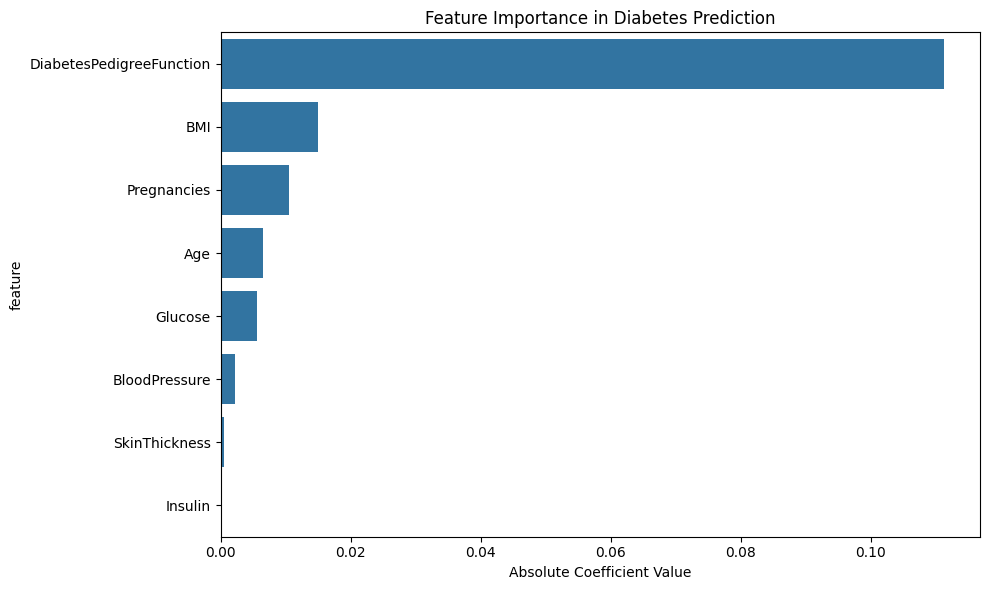

In [35]:
# 시각화: 특성 중요도
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Diabetes Prediction')
plt.xlabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()


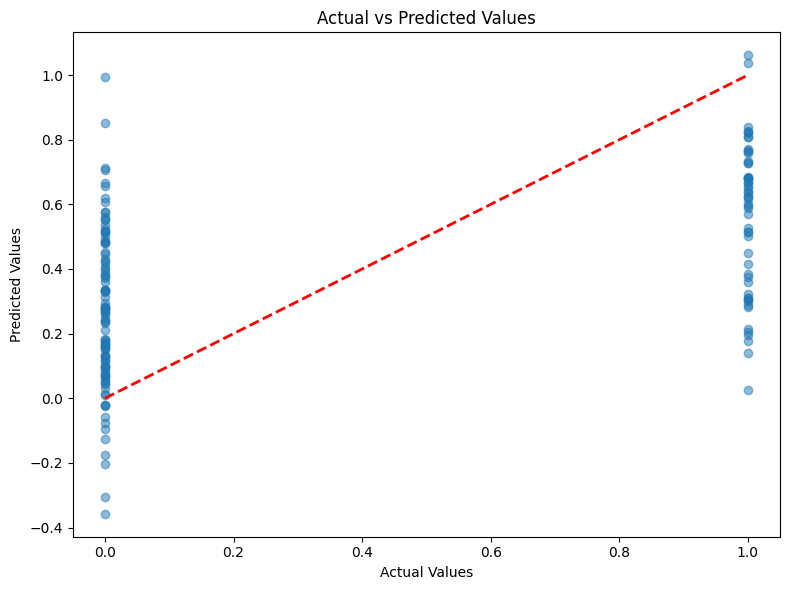

In [36]:
# 시각화: 실제값 vs 예측값

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.tight_layout()
plt.show()

#### 다중선형회귀

In [37]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [38]:
# 샘플 데이터 생성
# 공부 시간(X1)과 과외 시간(X2)에 따른 시험 점수(Y) 예측
study_hours = np.array([2, 3, 4, 5, 4, 6, 7, 8, 5, 4])  # 하루 공부 시간
tutor_hours = np.array([0, 1, 0, 2, 1, 3, 2, 3, 2, 1])  # 주간 과외 시간
test_scores = np.array([60, 70, 75, 85, 75, 90, 92, 95, 80, 75])  # 시험 점수

In [39]:
# 입력데이터 형태 맞추기
X = np.column_stack((study_hours, tutor_hours))
y = test_scores

In [40]:
# model 생성/학습
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [41]:
# result
print("* 회귀계수")
print(f"Study hours : {model.coef_[0]:.2f}")
print(f"Tutor hours : {model.coef_[1]:.2f}")
print(f"Intercept : {model.intercept_:.2f}")


* 회귀계수
Study hours : 4.87
Tutor hours : 1.94
Intercept : 53.39


In [42]:
# 새로운 데이터로 예측
new_student = np.array([[6,2]]) # study:6, tutor:2
prediction = model.predict(new_student)
print(f"\n예측점수 : {prediction[0]:.1f}")


예측점수 : 86.5


In [43]:
# 모델 성능 평가 (R-squared)
r_squared = model.score(X, y)
print(f"R-squared : {r_squared:.4f}")

R-squared : 0.9613


#### font

In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [45]:
# font 설정
font_path = './font/NanumGothic.ttf'
font = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font)
plt.rcParams['axes.unicode_minus'] = False # - 부호 깨짐 방지
pd.options.display.float_format = '{:.2f}'.format # 지수 표현식 방지

In [46]:
# 데이터 생성
np.random.seed(42)
n_samples = 100

In [47]:
# 독립변수
X1 = np.random.normal(0,1,n_samples)
X2 = np.random.normal(0,1,n_samples)
X3 = np.random.normal(0,1,n_samples)

# 종속변수
Y = 2*X1 + 3*X2 + 1.5*X3 + np.random.normal(0,1,n_samples)

In [48]:
# DataFrame
data = pd.DataFrame({
    'X1' : X1, 
    'X2' : X2,
    'X3' : X3,
    'Y' : Y
})

In [49]:
# train, test data 분리
X = data[['X1', 'X2', 'X3']]
y = data['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [51]:
# prediction
y_pred = model.predict(X_test)

In [52]:
# result
print("* 회귀계수")
for feature, coef in zip(X.columns, model.coef_):
    print(f"  {feature} : {coef: .4f}")
print(f"\n* Intercept : {model.intercept_:.4f}")
print(f"\n* R-squared : {r2_score(y_test, y_pred):.4f}")
print(f"\n* 평균제곱근 오차(RMSE) : {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")


* 회귀계수
  X1 :  1.7882
  X2 :  2.9284
  X3 :  1.5135

* Intercept : 0.1535

* R-squared : 0.9566

* 평균제곱근 오차(RMSE) : 0.7174


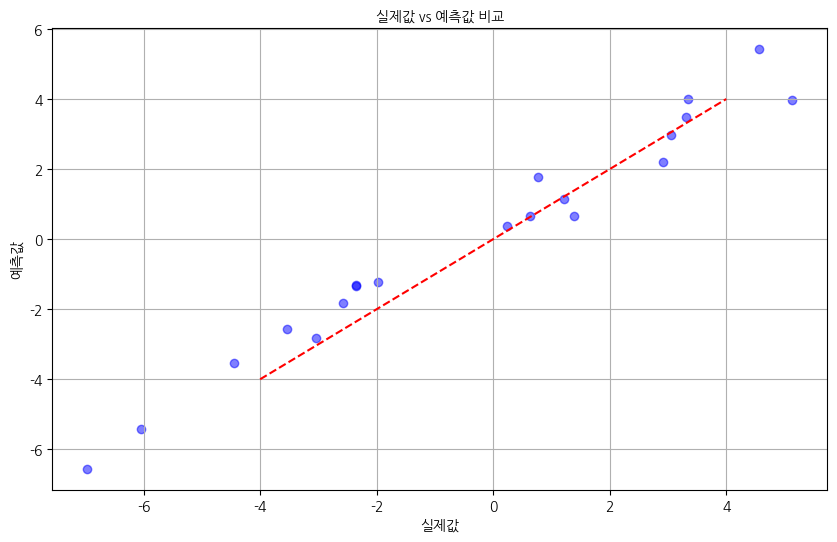

In [53]:
# 실제값과 예측값 비교 시각화
fontprop = fm.FontProperties(fname=font_path)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([-4, 4], [-4, 4], 'r--')  # 대각선
plt.xlabel('실제값', fontproperties=fontprop)
plt.ylabel('예측값', fontproperties=fontprop)
plt.title('실제값 vs 예측값 비교', fontproperties=fontprop)
plt.grid(True)
plt.show()


<span style="color:red"> WARNING:matplotlib.font_manager:findfont: Font family 'NanumGothic' not found. </span>

> 내 PC - C드라이브 - 사용자 - human-15(사용자컴퓨터) - .maplotlib - font.json파일 삭제 - vscode다시 실행

In [55]:
# new_data 예측
new_data = np.array([[0.5,1.0,-0.5]])
prediction = model.predict(new_data)
print(f"\nnew data 예측값 : {prediction[0]:.4f}")


new data 예측값 : 3.2192


c:\AI_project\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#### 선형회귀 추가학습

In [56]:
import matplotlib.pyplot as plt
import pandas as pd

In [57]:
dataset = pd.read_csv('./dataset/LinearRegressionData.csv')

In [58]:
dataset.head()

,hour,score
0,0.50,10
1,1.20,8
2,1.80,14
3,2.40,26
4,2.60,22


In [59]:
X = dataset.iloc[:, :-1].values # 마지막 한개 제외 (결과값 제외)
y = dataset.iloc[:,-1].values # 결과값만

X, y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]))

In [60]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [61]:
y_pred = reg.predict(X)
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

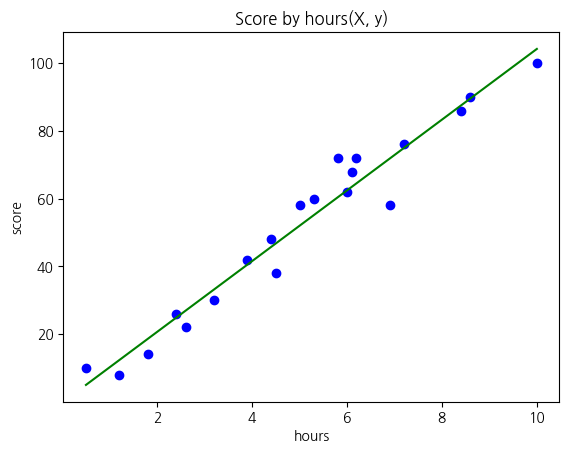

In [62]:
plt.scatter(X, y, color = 'blue')
plt.plot(X, y_pred, color = 'green')
plt.title('Score by hours(X, y)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [63]:
print('9시간 공부 시 예상 점수 : ', reg.predict([[9]]))

9시간 공부 시 예상 점수 :  [93.77478776]


In [64]:
reg.coef_ #기울기

array([10.44369694])

In [65]:
reg.intercept_ # y절편

np.float64(-0.218484702867201)

In [66]:
# 데이터는 똑같음 dataset = pd.read_csv('./dataset/LinearRegressionData.csv')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [67]:
X, len(X)

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 20)

In [68]:
print("* X_train")
X_train, len(X_train)

* X_train


(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

In [69]:
print("* X_test")
X_test, len(X_test)

* X_test


(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 4)

In [70]:
y, len(y)

(array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]),
 20)

In [71]:
print("* y_train")
y_train, len(y_train)

* y_train


(array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62]), 16)

In [72]:
print("* y_test")
y_test, len(y_test)

* y_test


(array([ 90,   8, 100,  38]), 4)

In [73]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

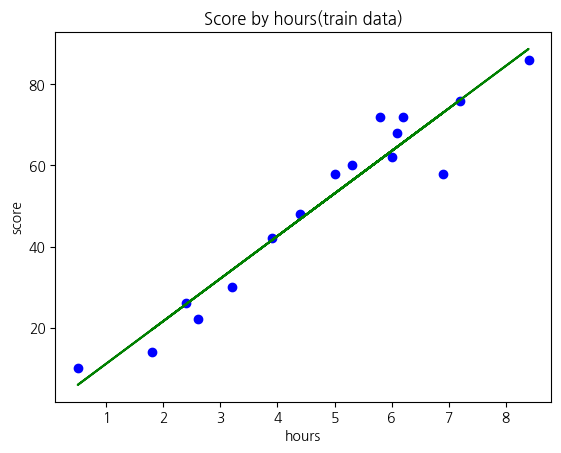

In [74]:
plt.scatter(X_train,y_train, color='blue')
plt.plot(X_train, reg.predict(X_train), color='green')
plt.title('Score by hours(train data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

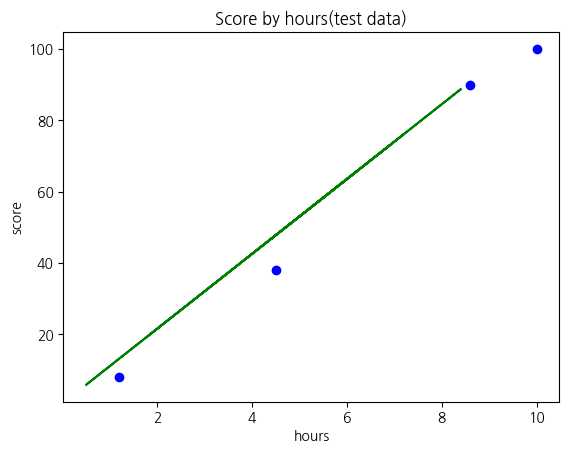

In [75]:
plt.scatter(X_test,y_test, color='blue')
plt.plot(X_train, reg.predict(X_train), color='green')
plt.title('Score by hours(test data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

#### 추가학습
학업 성취도 예측
> 데이터 설명
* Study_Hours: 하루 평균 공부 시간 (시간)
* Attendance_Rate: 출석률 (%)
* Parental_Education: 부모의 평균 학력 수준 (1: 초등학교 이하, 2: 중학교, 3: 고등학교, 4: 대학교 이상)
* Extra_Curricular: 방과 후 활동 참여 시간 (시간)
* Score: 학업 성취도 (점수)

In [76]:
# 라이브러리

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [77]:
# 데이터
np.random.seed(42)
n_samples = 200
# 독립변수
data = pd.DataFrame({
    'Study_hours' : np.random.uniform(0,10,n_samples),
    'Attendance_rate' : np.random.uniform(50,100,n_samples),
    'Parental_education' : np.random.choice([1,2,3,4],n_samples),
    'Extra_curricular' : np.random.uniform(0,5,n_samples)
})
# 종속변수
data['Score'] = (
    data['Study_hours'] * 10 +
    data['Attendance_rate'] * 0.3 +
    data['Parental_education'] * 5 +
    data['Extra_curricular'] * 2 +
    np.random.normal(0, 5, n_samples)  # 노이즈 추가
)

In [78]:
# data 분리
X = data[['Study_hours','Attendance_rate','Parental_education','Extra_curricular']]
y = data['Score']

In [79]:
# 범주형 변수 변환(One-Hot Encoding)
encoder = OneHotEncoder(sparse_output=False, drop="first")
X_parents_encoded = encoder.fit_transform(X[["Parental_education"]])
X_encoded = np.hstack([
    X[['Study_hours','Attendance_rate','Extra_curricular']].values,
    X_parents_encoded
])

In [80]:
# 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [81]:
# data 분리
X_train, X_test, y_train, y_test, = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [82]:
# model 학습
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [83]:
# 예측
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE : {mse}")
print(f"R-squared : {r2}")

MSE : 23.638645973928725
R-squared : 0.9749424587982598


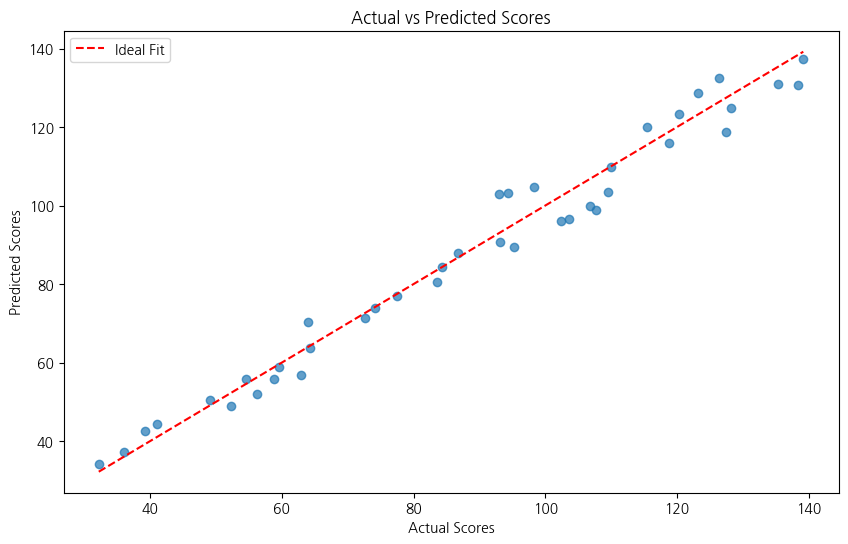

In [84]:
# 시각화
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred,alpha=0.7)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--',label = "Ideal Fit")
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs Predicted Scores")
plt.legend()  # 범례
plt.show()

##### 경사하강법 예제

In [85]:
from sklearn.linear_model import SGDRegressor
sr = SGDRegressor(max_iter=200, eta0=1e-4, random_state=0, verbose=1) # max_iter : 모델 학습 횟수, eta0 : 학습율(1e-4: 0.0001), versbose=1 학습결과출력
sr.fit(X_train, y_train)

-- Epoch 1
Norm: 0.20, NNZs: 6, Bias: 0.525639, T: 160, Avg. loss: 4275.427710
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 6, Bias: 0.881460, T: 320, Avg. loss: 4235.112639
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.42, NNZs: 6, Bias: 1.192396, T: 480, Avg. loss: 4202.982390
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.52, NNZs: 6, Bias: 1.477101, T: 640, Avg. loss: 4174.315806
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.60, NNZs: 6, Bias: 1.743499, T: 800, Avg. loss: 4147.837700
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.69, NNZs: 6, Bias: 1.995860, T: 960, Avg. loss: 4123.005364
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.77, NNZs: 6, Bias: 2.237333, T: 1120, Avg. loss: 4099.425410
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.85, NNZs: 6, Bias: 2.469574, T: 1280, Avg. loss: 4076.869690
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.92, NNZs: 6, Bias: 2.694125, T: 1440, Avg. loss: 4055.178908
Total 

c:\AI_project\.venv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(eta0=0.0001, max_iter=200, random_state=0, verbose=1)

In [86]:
print(X_train.shape)
print(y_train.shape)

(160, 6)
(160,)


ValueError: x and y must be the same size

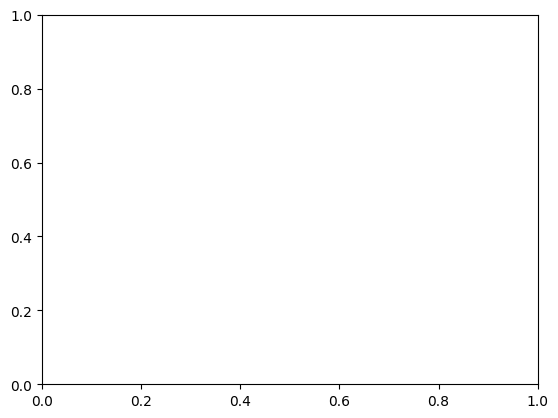

In [14]:
plt.scatter(X_train,y_train, color='blue')
plt.plot(X_train, sr.predict(X_train), color='green')
plt.title('Score by hours(test data, SGD)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [87]:
sr.coef_, sr.intercept_

(array([ 7.66036762,  0.60592109,  1.20381832, -0.07302224,  0.34811125,
         2.02324281]),
 array([23.97685065]))

In [88]:
sr.score(X_test, y_test)

-3.957562023805587

In [89]:
sr.score(X_train, y_train)

-4.067813586564625

#### 로지스틱 회귀

In [90]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [91]:
dataset = pd.read_csv('./dataset/LogisticRegressionData.csv')
dataset.head()

,hour,pass
0,0.50,0
1,1.20,0
2,1.80,0
3,2.40,0
4,2.60,0


In [95]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:, -1].values

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [97]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train) # 훈련

LogisticRegression()

In [98]:
classifier.predict([[6]]) # 6시간 했을 때 예측

array([1])

In [111]:
classifier.predict_proba([[6]]) # 각 클래스에 속할 확률(분류에 사용)
# array([[0.141483, 0.858517]]) 0-> 14% 정도, 1->85%정도

array([[0.141483, 0.858517]])

In [101]:
classifier.predict([[4]])

array([0])

In [102]:
classifier.predict_proba([[4]])

array([[0.62497682, 0.37502318]])

In [103]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 1, 1])

In [104]:
y_test

array([1, 0, 1, 0])

In [105]:
X_test

array([[ 8.6],
       [ 1.2],
       [10. ],
       [ 4.5]])

In [106]:
# 정확도 반환
classifier.score(X_test, y_test)

0.75

In [107]:
X_range = np.arange(min(X), max(X), 0.1)
X_range         # 1차원

C:\Users\human-15\AppData\Local\Temp\ipykernel_13856\3009068081.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_range = np.arange(min(X), max(X), 0.1)


array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,
       3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,
       4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6,
       5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9,
       7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2,
       8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5,
       9.6, 9.7, 9.8, 9.9])

In [108]:
# classifier.coef_: 모델의 계수(가중치), X_range: 입력 데이터, classifier.intercept_: 모델의 절편
p = 1/(1+np.exp(-(classifier.coef_ * X_range + classifier.intercept_)))
p       # 2차원

array([[0.01035583, 0.01161118, 0.0130167 , 0.01458984, 0.01634996,
        0.01831847, 0.02051904, 0.02297778, 0.0257234 , 0.02878743,
        0.03220437, 0.03601184, 0.04025075, 0.04496534, 0.05020326,
        0.05601555, 0.06245651, 0.06958349, 0.07745655, 0.08613794,
        0.09569142, 0.10618136, 0.1176716 , 0.13022408, 0.14389721,
        0.15874395, 0.17480973, 0.19213011, 0.21072838, 0.23061305,
        0.25177552, 0.27418791, 0.29780133, 0.32254464, 0.348324  ,
        0.37502318, 0.40250484, 0.43061281, 0.45917517, 0.4880083 ,
        0.51692146, 0.54572176, 0.57421932, 0.60223222, 0.62959096,
        0.65614237, 0.6817526 , 0.70630918, 0.72972211, 0.75192414,
        0.77287004, 0.79253536, 0.81091459, 0.82801892, 0.84387392,
        0.858517  , 0.87199503, 0.88436205, 0.89567719, 0.90600282,
        0.91540298, 0.923942  , 0.93168343, 0.9386892 , 0.94501893,
        0.95072949, 0.95587461, 0.96050477, 0.96466704, 0.96840509,
        0.97175925, 0.97476661, 0.97746114, 0.97

In [110]:
X_range.shape

(95,)

In [112]:
p = p.reshape(-1)
p.shape

(95,)

위의 reshape 예시 arr = np.array([[1, 2, 3], [4, 5, 6]])

(2, 3) 형태의 배열을 (6,) 형태의 1차원 배열로 변환 arr_reshaped = arr.reshape(-1) print(arr_reshaped) # 출력: [1 2 3 4 5 6]

(2, 3) 형태의 배열을 (3, 2) 형태의 배열로 변환 arr_reshaped = arr.reshape(3, -1) print(arr_reshaped) # 출력: [[1 2], [3 4],[5 6]]

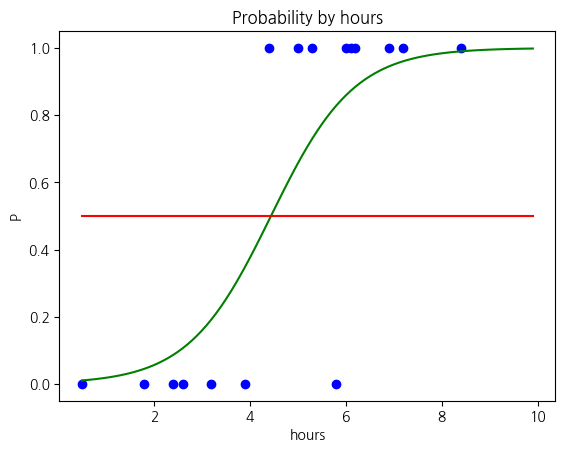

In [113]:
# X_train
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_range, p, color='green')
plt.plot(X_range, np.full(len(X_range),0.5), color='red')
plt.title('Probability by hours')
plt.xlabel('hours')
plt.ylabel('P')
plt.show()

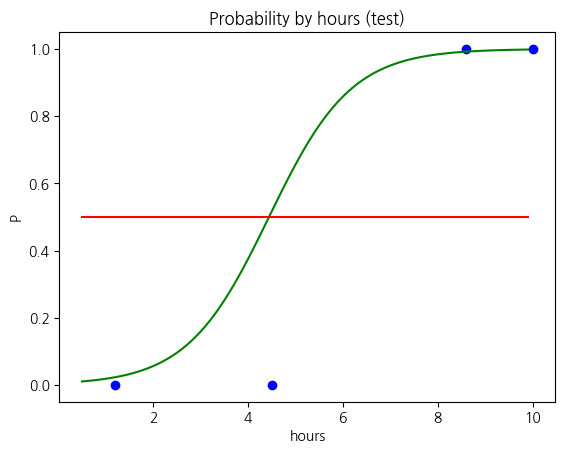

In [114]:
# X_test
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_range, p, color='green')
plt.plot(X_range, np.full(len(X_range), 0.5), color='red')  # y축에 일정한 값인 0.5를 유지하는 직선
plt.title('Probability by hours (test)')
plt.xlabel('hours')
plt.ylabel('P')
plt.show()

### 분류

#### 의사결정나무

In [115]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [116]:
# Data load
iris = load_iris()
X = iris.data
y = iris.target

In [117]:
# data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=42)

In [118]:
# Decission tree model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [119]:
# prediction
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 2, 1, 1, 0, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 1, 0, 2, 1, 2, 0,
       1, 1, 2, 0, 1, 0, 0, 0])

In [122]:
# 정확도 평가
print("Accuracy : ", clf.score(X_test, y_test))

Accuracy :  0.9666666666666667


#### 나이브 베이즈(Naive Bayes) : 텍스트 분류 문제에서 매우 효과적
    빈도수를 가지고 판단

In [123]:
# 스팸메일 분류 예제
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report # 평가지표 Ex)MSE, r2 / accuracy_score:정확도, classification_report:리포팅

In [124]:
# data load
data = pd.read_csv('./dataset/spam.csv', encoding='ISO-8859-1')
data = data[['v1', 'v2']] # 필요한 열만 선택
data.columns = ['label', 'text'] # 열 이름 변경

In [125]:
# 데이터 전처리
data['label'] = data['label'].map({'ham':0, 'spam':1}) # label -> number
data.dropna(inplace=True) # 결측치 제거

In [126]:
# data split
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

In [127]:
# TF-IDF 벡터화
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [128]:
# model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [130]:
# 예측 및 평가
y_pred = model.predict(X_test_tfidf)
print("Accuracy : ", accuracy_score(y_test, y_pred))
print("\nClassification Report : \n", classification_report(y_test, y_pred))

Accuracy :  0.9668161434977578

Classification Report : 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [132]:
# sample test
sample_text = ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 now!",
               "Congratulations! You've been selected to receive a free iPhone 15. Click to claim now!",
               "Hey, are we meeting for lunch tomorrow?"]
sample_tfidf = vectorizer.transform(sample_text) 
predictions = model.predict(sample_tfidf)
for text, label in zip(sample_text, predictions):
    print(f"Text : {text} => {'Spam' if label == 1 else 'Ham'}")

Text : Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 now! => Spam
Text : Congratulations! You've been selected to receive a free iPhone 15. Click to claim now! => Spam
Text : Hey, are we meeting for lunch tomorrow? => Ham


#### SVM(support vector machine)

In [133]:
# 라이브러리
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [134]:
# data load
data = pd.read_csv('./dataset/spam.csv', encoding='ISO-8859-1')
data = data[['v1', 'v2']]
data.columns = ['label', 'text']

In [135]:
# data preprocessing
data['label'] = data['label'].map({'ham':0, 'spam':1})
data.dropna(inplace=True)

In [136]:
# data split
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

In [137]:
# TF_IDF Vectorize
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [139]:
# SVM model
model = SVC(kernel='linear', random_state=42)
model.fit(X_train_tfidf, y_train)

SVC(kernel='linear', random_state=42)

In [140]:
# prediction
y_pred = model.predict(X_test_tfidf)
print("Accuracy : ", accuracy_score(y_test, y_pred))
print("\nClassification Report : \n", classification_report(y_test, y_pred))

Accuracy :  0.979372197309417

Classification Report : 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.97      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [141]:
# sample test 
sample_text = [
    "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 now!",
    "Congratulations! You've been selected to receive a free iPhone 15. Click to claim now!",
    "Hey, are we meeting for lunch tomorrow?"
]
sample_tfidf = vectorizer.transform(sample_text)
predictions = model.predict(sample_tfidf)
for text, label in zip(sample_text, predictions):
    print(f"Text : {text} => {'Spam' if label == 1 else 'Ham'}")

Text : Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 now! => Spam
Text : Congratulations! You've been selected to receive a free iPhone 15. Click to claim now! => Spam
Text : Hey, are we meeting for lunch tomorrow? => Ham


#### KNN(K 최근접 이웃)

In [142]:
# KNN(K 최근접 이웃) 분류 예제
# iris 데이터셋셋 : 꽃받침(Sepal)과 꽃잎(Petal)의 길이 너비로 품종을 분류
# library
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


In [143]:
# data load
iris = load_iris()
X, y = iris.data, iris.target

In [144]:
# data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [145]:
# data standard
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [146]:
# KNN model
knn = KNeighborsClassifier(n_neighbors=3) # k=3
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [147]:
# prediction
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [152]:
# model 성능 평가
print("모델 성능 평가 : \n")
print("Accuracy : ", accuracy_score(y_test, y_pred))
print("\n분류보고서 : \n", classification_report(y_test, y_pred ,target_names=iris.target_names))

#  macro avg : 가중치 안들어간 평균, weighted avg : 가중치 들어간 평균

모델 성능 평가 : 

Accuracy :  1.0

분류보고서 : 
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [150]:
# 새로운 데이터에 대한 예측
new_samples = [
    [5.1, 3.5, 1.4, 0.2],  # Setosa
    [6.2, 3.4, 5.4, 2.3],  # Virginica
    [5.9, 3.0, 4.2, 1.5],  # Versicolor
]

new_samples = scaler.transform(new_samples)  # standard
predictions = knn.predict(new_samples)

In [151]:
print("\n새로운 데이터에 대한 예측 결과  : ")
for i, pred in enumerate(predictions):
    print(f"Sample {i+1} : {iris.target_names[pred]}")


새로운 데이터에 대한 예측 결과  : 
Sample 1 : setosa
Sample 2 : virginica
Sample 3 : versicolor


### 성능지표 분석

#### MSE(Mean Squared Error, 평균제곱오차)

In [153]:
# 실제값과 예측값 정의
actual_val = [3, -0.5, 2, 7]
predicted_val = [2.5, 0, 2, 8]

In [155]:
# MSE
squared_error = [(a-p) ** 2 for a, p in zip(actual_val, predicted_val)] # 각 오차를 제곱
mse = sum(squared_error)/len(squared_error) # 제곱 오차의 평균

In [156]:
# result
print("Mean Squared Error(MSE) : ", mse)

Mean Squared Error(MSE) :  0.375


#### RMSE(Root Mean Squared Error, 평균제곱근오차)

In [158]:
# 실제값과 예측값 정의
actual_val2 = [3, -0.5, 2, 7]
predicted_val2 = [2.5, 0, 2, 8]

In [159]:
# RMSE
squared_error2 = [(a-p)**2 for a, p in zip(actual_val2, predicted_val2)]
mse = sum(squared_error2)/len(squared_error2)
rmse = mse ** 0.5 # mse의 제곱근 = rmse

In [160]:
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.6123724356957945


#### MAE(Mean Absolute Error, 평균절대오차)

In [161]:
# 실제값과 예측값 정의
actual_val3 = [3, -0.5, 2, 7]
predicted_val3 = [2.5, 0, 2, 8]

In [162]:
# MAE
absolute_error = [abs(a-p) for a, p in zip(actual_val3, predicted_val3)]
mae = sum(absolute_error)/len(absolute_error) # 절대오차의 평균

In [163]:
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 0.5


#### Accuracy(정확도)

In [164]:
# 실제값과 예측값 정의
actual_val4 = [1,0,1,1,0,1,0,0,1,0]
predicted_val4 = [1,0,1,0,0,1,1,0,1,0]

In [165]:
# Acurracy
correct_pred = sum([1 for a, p in zip(actual_val4, predicted_val4) if a==p]) # 정확히 예측한 계수
accuracy = correct_pred / len(actual_val4) # total data 중 정확히 예측한 비율

In [166]:
# result 
print("Accuracy : ", accuracy)

Accuracy :  0.8


#### 기타 예제

In [167]:
import numpy as np

In [168]:
# prediction value
y_pred = np.array([1.2, 0.7, 2.5])
# actual value
y_true = np.array([1.0, 0.5, 2.5])

In [169]:
# Mse
def mse_loss(y_true, y_pred):
    return np.mean(((y_true - y_pred) ** 2))

loss = mse_loss(y_true, y_pred)
print("MSE loss : ", loss)

MSE loss :  0.026666666666666655


#### diabetes(당뇨병) 데이터셋을 활용한 예제 (결과치가 안좋은 사례)

In [1]:
# 라이브러리
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# font
plt.rcParams['font.family'] = 'NanumGothic'

In [3]:
# 마이너스 부호 깨짐 지정
plt.rcParams['axes.unicode_minus'] = False

In [4]:
# data load
diabetes = pd.read_csv('./dataset/diabetes.csv')

In [5]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# 특성(X)과 타겟(y) 분리
X = diabetes.drop('Outcome', axis=1)  # Outcome 열을 제외한 모든 특성
y = diabetes['Outcome']  # 타겟 변수

In [7]:
# data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# linearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
# prediction
y_pred = model.predict(X_test)

In [12]:
# model 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [13]:
# result
print('모델 성능 평가 결과:')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R2 Score: {r2:.4f}')

모델 성능 평가 결과:
MSE: 0.1710
RMSE: 0.4136
R2 Score: 0.2550


In [14]:
# 각 특성의 계수(가중치)출력
feature_coefficients = pd.DataFrame({
    '특성' : X.columns,
    '계수' : model.coef_
})
print("\n특성별 가중치 : ")
print(feature_coefficients)


특성별 가중치 : 
                         특성        계수
0               Pregnancies  0.010468
1                   Glucose  0.005634
2             BloodPressure -0.002281
3             SkinThickness  0.000532
4                   Insulin -0.000278
5                       BMI  0.015039
6  DiabetesPedigreeFunction  0.111263
7                       Age  0.006460


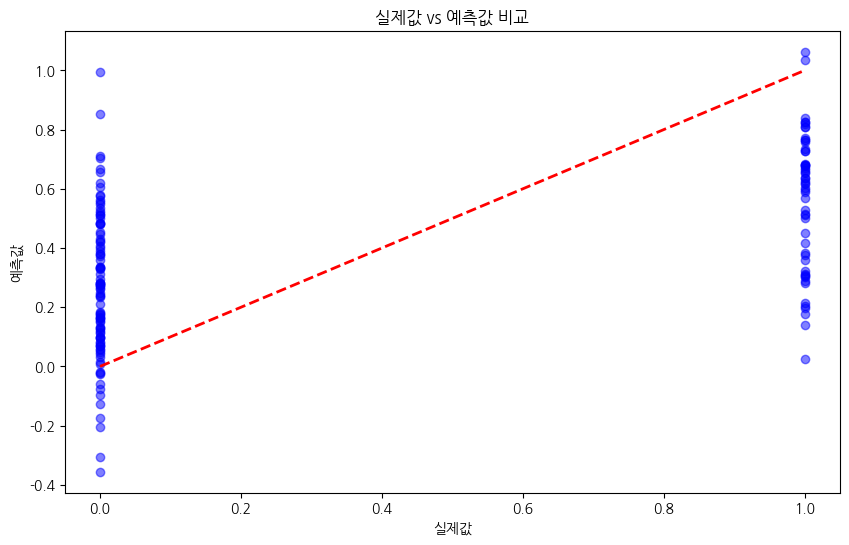

In [16]:
# 실제값과 예측값 비교 시각화
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color = 'blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('실제값 vs 예측값 비교')
plt.show()

#### 랜덤포레스트를 활용한 당뇨병 데이터 알아보기 예제

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# 데이터 로드
data = pd.read_csv('./dataset/diabetes.csv')

In [19]:
# 특성(X)과 타겟(y) 분리
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [20]:
# 데이터 전처리: 특성 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [21]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [22]:
# 랜덤 포레스트 모델 생성 및 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
# 예측
y_pred = rf_model.predict(X_test)

In [24]:
# 교차 검증 수행
cv_scores = cross_val_score(rf_model, X_scaled, y, cv=5)

In [25]:
# 특성 중요도 계산
feature_importance = pd.DataFrame({
    '특성': X.columns,
    '중요도': rf_model.feature_importances_
}).sort_values('중요도', ascending=False)

In [26]:
# 결과 출력
print("모델 성능 평가:")
print("\n교차 검증 점수:")
print(f"평균 정확도: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
print("\n분류 리포트:")
print(classification_report(y_test, y_pred))

모델 성능 평가:

교차 검증 점수:
평균 정확도: 0.7657 (+/- 0.0715)

분류 리포트:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        99
           1       0.62      0.62      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



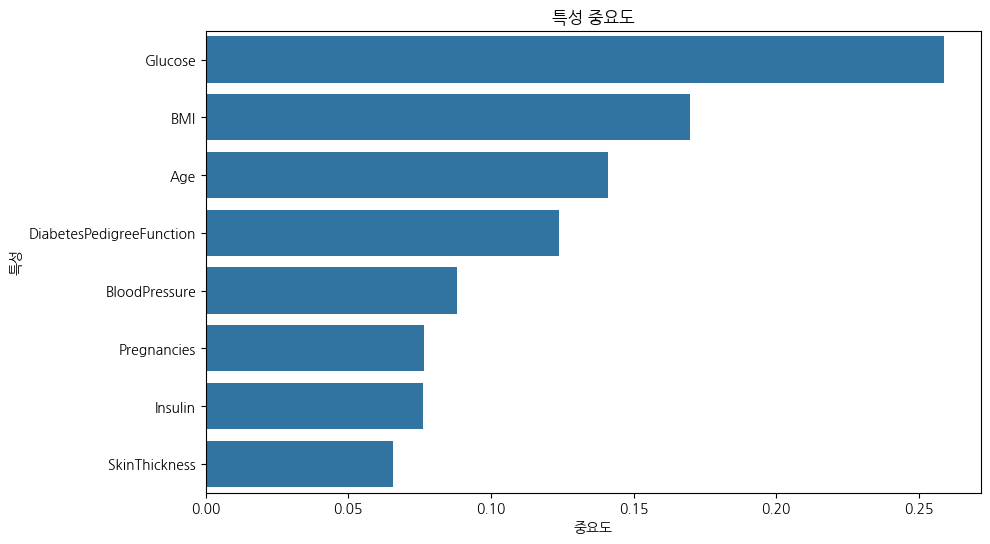

In [27]:
# 특성 중요도 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='중요도', y='특성', data=feature_importance)
plt.title('특성 중요도')
plt.show()

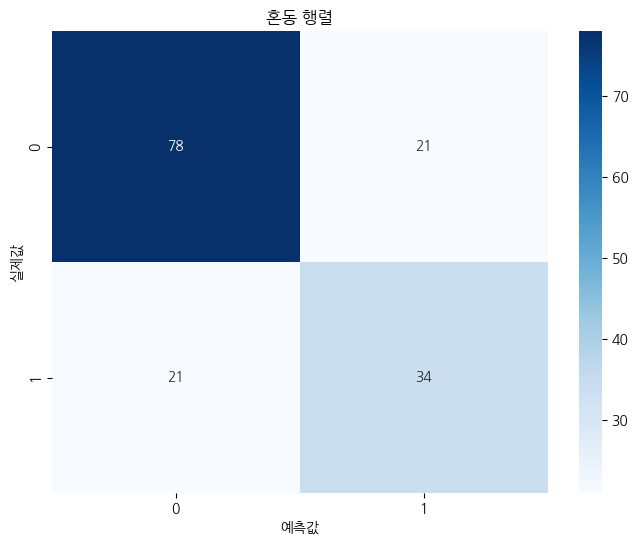

In [28]:
# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('혼동 행렬')
plt.xlabel('예측값')
plt.ylabel('실제값')
plt.show()

In [29]:
# 새로운 환자 데이터로 예측 예시
print("\n새로운 환자 데이터 예측 예시:")
# 임의의 환자 데이터 생성
new_patient = X_test.iloc[0:1]
prediction = rf_model.predict(new_patient)
prediction_prob = rf_model.predict_proba(new_patient)

print(f"예측 결과: {'당뇨병 환자' if prediction[0] == 1 else '정상'}")
print(f"당뇨병일 확률: {prediction_prob[0][1]:.2%}")


새로운 환자 데이터 예측 예시:
예측 결과: 정상
당뇨병일 확률: 31.00%


In [31]:
# 예측 신뢰도 분석
threshold_probs = rf_model.predict_proba(X_test)
confidence_socres = np.max(threshold_probs, axis=1)


예측 신뢰도 분포 : 


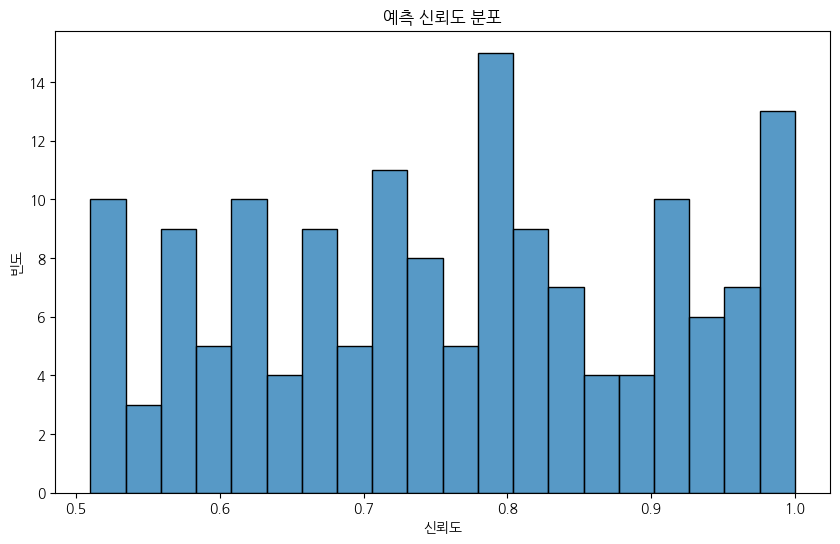

In [32]:
print("\n예측 신뢰도 분포 : ")
plt.figure(figsize=(10,6))
sns.histplot(confidence_socres, bins=20)
plt.title("예측 신뢰도 분포")
plt.xlabel('신뢰도')
plt.ylabel('빈도')
plt.show()

#### 보스톤 집값 분석 예제

In [33]:
### 컬럼 설명 ###
# CRIM(타운별 1인당 범죄울), ZN(25,000평방피트 주택이 차지하는 비율), INDUS(비소매 상업지역 면적비율)
# CHAS(찰스강 인접 여부), NOX(일산화질소 농도), RM(주택 1가구당 평균 방 개수), AGE(1940년대 이전 주택 비율)
# DIS(보스턴 고용 센터까지의 가중거리), TAX(10,000달러당 재산세율), PTRATIO(타운별 학생교사 비율)
# B(타운별 흑인인구 비율 계산식), LSTAT(하위 계층의 비율), MEDV(주택의 중간 가격)

In [34]:
# library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
# font
plt.rcParams['font.family'] = 'NanumGothic'

# 마이너스 부호 깨짐 지정
plt.rcParams['axes.unicode_minus'] = False

# 숫자가 지수표현식으로 나올때 지정
pd.options.display.float_format = '{:.2f}'.format

In [36]:
# data load
data = pd.read_csv('dataset/HousingData.csv')

In [37]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1,296,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2,242,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2,242,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3,222,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3,222,18.70,396.90,NaN,36.20


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [39]:
# 결측치
print(data.isnull().sum())

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [40]:
data = data.dropna()

In [41]:
print(data.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [42]:
# 변수선택
X = data[['CRIM', 'RM', 'TAX', 'LSTAT']]  # 입력 변수: CRIM(범죄율), RM(방개수), TAX(세금), LSTAT(하위계층비율율)
y = data['MEDV']  # 타겟 변수 (집값)

In [43]:
# data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [46]:
# model 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [47]:
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error: 41.01145441904804
R2 Score: 0.5137736507938266


In [48]:
# 회귀계수
print('회귀계수 : ', model.coef_)
print('절편 :',model.intercept_)

회귀계수 :  [-0.08498347  5.59693339 -0.00824347 -0.42511164]
절편 : -3.831014747888208


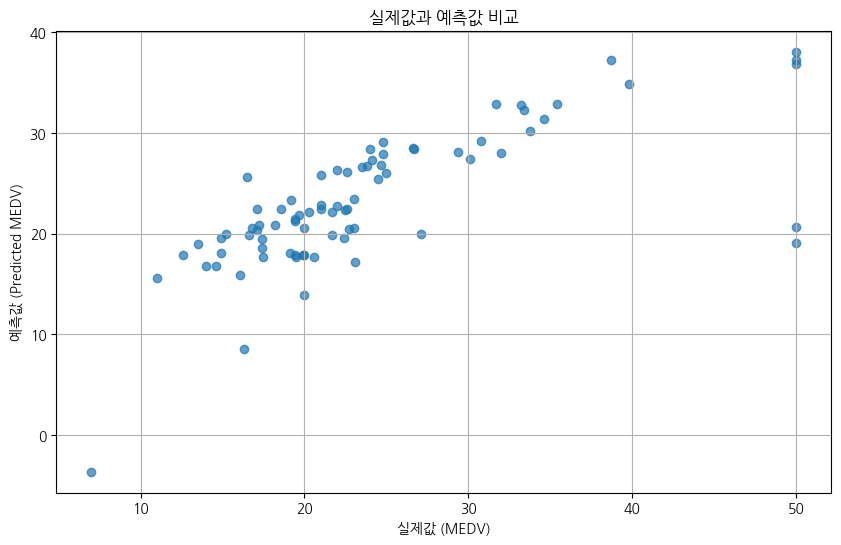

In [49]:
# 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('실제값 (MEDV)')
plt.ylabel('예측값 (Predicted MEDV)')
plt.title('실제값과 예측값 비교')
plt.grid()
plt.show()

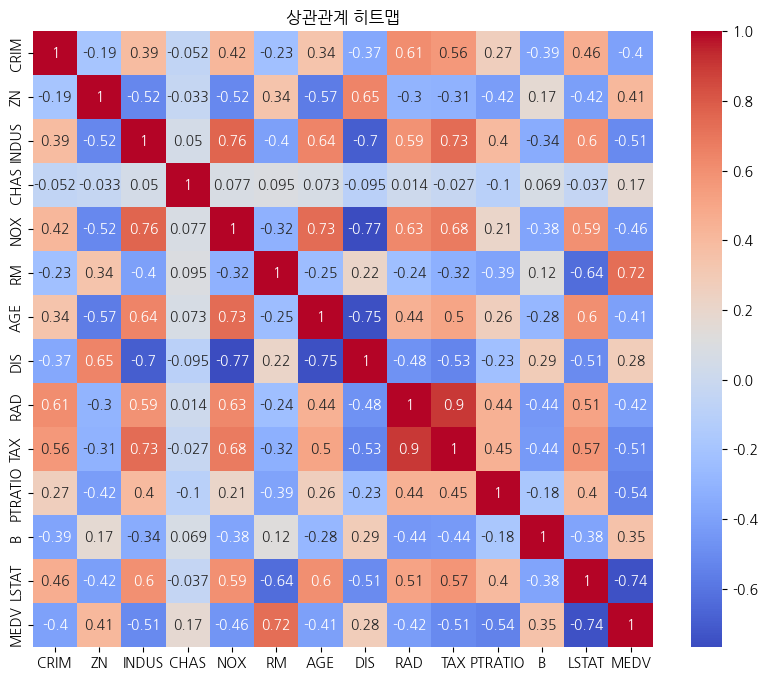

In [50]:
# 변수별 상관관계 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('상관관계 히트맵')
plt.show()

#### 랜덤포레스트 모델 활용한 예제(cf. 다른 회귀모델 성능 비교)

In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [52]:
# data load
data = pd.read_csv('dataset/HousingData.csv')

In [54]:
# data preprocessing
data = data.dropna()  # 결측값 제거
X = data[['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'TAX', 'LSTAT']]
y = data['MEDV']

In [55]:
# data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# 1. randomforest
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)  # n_estimators : 모델을 구성하는 결정 틀의 개수
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

In [60]:
# rf 평가
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
print(f"랜덤 포레스트 :\n MSE: {rf_mse:.2f}\n R2: {rf_r2:.2f}")

랜덤 포레스트 :
 MSE: 28.63
 R2: 0.66


In [61]:
# 2. 다른 모델 비교
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42)
}

In [63]:
result = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    result[name] = {"MSE" : mse, "R2" : r2}
    print(f"{name} - MSE : {mse:.2f}, R2 : {r2:.2f}")

Linear Regression - MSE : 36.34, R2 : 0.57
Decision Tree - MSE : 27.30, R2 : 0.68


In [64]:
# 3. 최적 모델 선택 및 시각화
result["Random Forest"] = {"MSE":rf_mse, "R2":rf_r2}
best_model = max(result, key=lambda x: result[x]['R2'])
print("Best Model : ", best_model)

Best Model :  Decision Tree


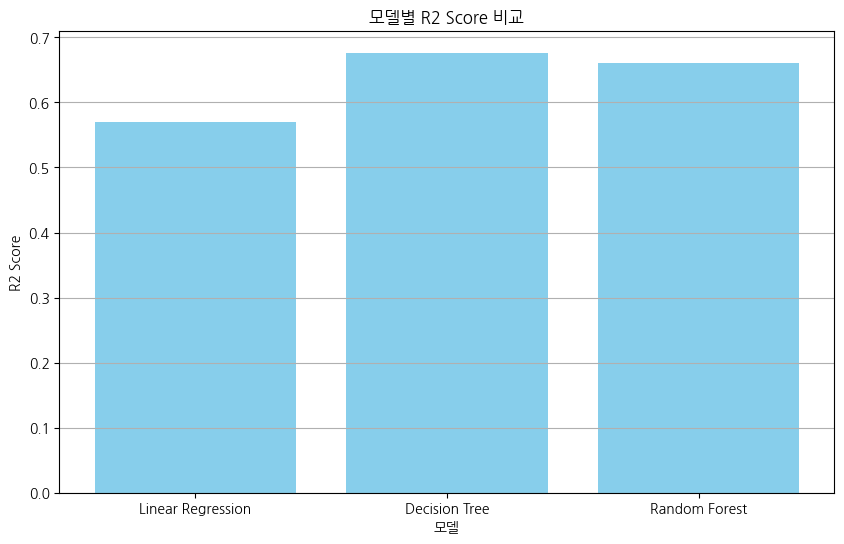

In [65]:
# result visualize
r2_scores = [result["R2"] for result in result.values()]
model_names = list(result.keys())
plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_scores, color='skyblue')
plt.xlabel("모델")
plt.ylabel("R2 Score")
plt.title("모델별 R2 Score 비교")
plt.grid(axis='y')
plt.show()

In [66]:
# 4. 랜덤 포레스트 하이퍼파라미터 튜닝 (옵션)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

In [67]:
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [69]:
print("\n최적 하이퍼파라미터:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_
tuned_rf_y_pred = best_rf_model.predict(X_test)


최적 하이퍼파라미터: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}


In [70]:
# 튜닝된 모델 평가
tuned_rf_mse = mean_squared_error(y_test, tuned_rf_y_pred)
tuned_rf_r2 = r2_score(y_test, tuned_rf_y_pred)
print(f"튜닝된 랜덤 포레스트 - MSE: {tuned_rf_mse:.2f}, R2: {tuned_rf_r2:.2f}")

튜닝된 랜덤 포레스트 - MSE: 28.63, R2: 0.66


#### 미세먼지(PM10) 예측 예제

In [1]:
# library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime

In [2]:
# font
plt.rcParams['font.family'] = 'Malgun Gothic'

# unicode_minus
plt.rcParams['axes.unicode_minus'] = False

# float_format
pd.options.display.float_format = '{:.2f}'.format

In [3]:
# data load
file_path = "dataset/seoul_pm10.csv"
df = pd.read_csv(file_path, encoding='cp949')

In [4]:
print("Data size : ", df.shape)
print("\nFirst 5 columns : ")
display(df.head())

Data size :  (227759, 4)

First 5 columns : 


,date,area,pm10,pm2.5
0,2022-12-31 23:00,강남구,57.00,44.00
1,2022-12-31 23:00,강동구,68.00,55.00
2,2022-12-31 23:00,강북구,59.00,42.00
3,2022-12-31 23:00,강서구,62.00,40.00
4,2022-12-31 23:00,관악구,57.00,38.00


In [7]:
# data info
print("\nData 기간 :", df['date'].min(), "~", df['date'].max())
print("총 관측 수 : ", len(df))
print("Region number : ",df['area'].nunique())
print("\n결측치 개수 : ")
display(df.isnull().sum())


Data 기간 : 2022-01-01 0:00 ~ 2022-12-31 9:00
총 관측 수 :  227759
Region number :  26

결측치 개수 : 


date        0
area        0
pm10     4916
pm2.5    4247
dtype: int64

In [8]:
# 데이터 전처리
# 날짜 변환
df['date'] = pd.to_datetime(df['date'])

# 결측치 처리
df['pm10'] = df['pm10'].fillna(df['pm10'].mean())
df['pm2.5'] = df['pm2.5'].fillna(df['pm2.5'].mean())

# 시간 관련 피처 추가
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month

# 지역 원-핫 인코딩
df_encoded = pd.get_dummies(df, columns=['area'], prefix='area')

In [11]:
# 전처리된 데이터 확인
print("\nPreprocessing data sample : ")
display(df_encoded.head())


Preprocessing data sample : 


,date,pm10,pm2.5,hour,day_of_week,month,area_강남구,area_강동구,area_강북구,area_강서구,...,area_성북구,area_송파구,area_양천구,area_영등포구,area_용산구,area_은평구,area_종로구,area_중구,area_중랑구,area_평균
0,2022-12-31 23:00:00,57.00,44.00,23,5,12,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2022-12-31 23:00:00,68.00,55.00,23,5,12,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2022-12-31 23:00:00,59.00,42.00,23,5,12,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,2022-12-31 23:00:00,62.00,40.00,23,5,12,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,2022-12-31 23:00:00,57.00,38.00,23,5,12,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
# PM10 model
features_pm10 = ['pm2.5', 'hour', 'day_of_week', 'month'] + [col for col in df_encoded.columns if col.startswith('area_')]
X_pm10 = df_encoded[features_pm10]
y_pm10 = df_encoded['pm10']

In [14]:
# PM25 model
# PM2.5 모델 학습
features_pm25 = ['pm10', 'hour', 'day_of_week', 'month'] + [col for col in df_encoded.columns if col.startswith('area_')]
X_pm25 = df_encoded[features_pm25]
y_pm25 = df_encoded['pm2.5']

In [15]:
# 데이터 분할
X_train_pm10, X_test_pm10, y_train_pm10, y_test_pm10 = train_test_split(X_pm10, y_pm10, test_size=0.2, random_state=42)
X_train_pm25, X_test_pm25, y_train_pm25, y_test_pm25 = train_test_split(X_pm25, y_pm25, test_size=0.2, random_state=42)

In [19]:
# linearRegression
model_pm10 = LinearRegression()
model_pm25 = LinearRegression()
model_pm10.fit(X_train_pm10, y_train_pm10)
model_pm25.fit(X_train_pm25, y_train_pm25) 

LinearRegression()

In [20]:
# prediction
y_pred_pm10 = model_pm10.predict(X_test_pm10)
y_pred_pm25 = model_pm25.predict(X_test_pm25)

In [21]:
print("\nPM10 모델 성능:")
print(f"R² Score: {r2_score(y_test_pm10, y_pred_pm10):.4f}")
print(f"MSE: {mean_squared_error(y_test_pm10, y_pred_pm10):.4f}")


PM10 모델 성능:
R² Score: 0.6079
MSE: 198.3575


In [22]:
print("\nPM2.5 모델 성능:")
print(f"R² Score: {r2_score(y_test_pm25, y_pred_pm25):.4f}")
print(f"MSE: {mean_squared_error(y_test_pm25, y_pred_pm25):.4f}")


PM2.5 모델 성능:
R² Score: 0.6136
MSE: 73.9499


In [45]:
# 2023년 1월 1일 예측을 위한 함수
def create_prediction_data(area):
    predictions = []
    for hour in range(24):
        pred_data = {
            'hour': hour,
            'day_of_week': 6,  # 2023년 1월 1일은 일요일
            'month': 1
        }

        # 지역 원-핫 인코딩 추가
        for area_col in [col for col in df_encoded.columns if col.startswith('area_')]:
            pred_data[area_col] = 1 if area_col == f'area_{area}' else 0

        predictions.append(pred_data)

    return pd.DataFrame(predictions)

In [46]:
# user input - select area
areas = sorted(df['area'].unique())
print("\nPredictable Area : ")
display(areas)


Predictable Area : 


['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구',
 '평균']

In [47]:
# 예시로 한 지역 선택 (실제로는 사용자가 선택)
selected_area = areas[0]  # 첫 번째 지역 선택
print(f"\n선택된 지역: {selected_area}")


선택된 지역: 강남구


In [48]:
# 2023-01-01 prediction
future_data = create_prediction_data(selected_area)
pm10_predictions = []
pm25_predictions = []

In [49]:
# 반복 예측 (PM10과 PM2.5 상호 의존성 처리)
for hour in range(24):
    hour_data = future_data.iloc[[hour]].copy()

    # 초기값 설정
    hour_data['pm2.5'] = df['pm2.5'].mean()
    hour_data['pm10'] = df['pm10'].mean()

    # 반복 예측으로 정확도 향상
    for _ in range(3):
        pm10_pred = model_pm10.predict(hour_data[features_pm10])
        pm25_pred = model_pm25.predict(hour_data[features_pm25])

        hour_data['pm10'] = pm10_pred
        hour_data['pm2.5'] = pm25_pred

    pm10_predictions.append(pm10_pred[0])
    pm25_predictions.append(pm25_pred[0])

In [50]:
# 결과 시각화
plt.figure(figsize=(15,10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

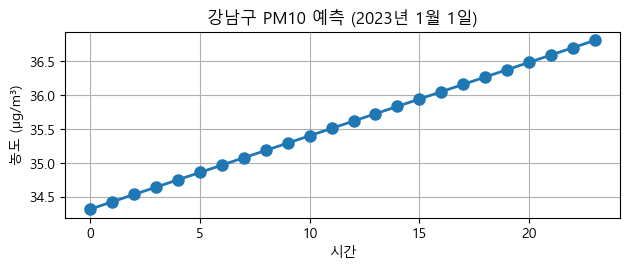

In [51]:
# PM10 그래프
plt.subplot(2, 1, 1)
plt.plot(range(24), pm10_predictions, marker='o', linewidth=2, markersize=8)
plt.title(f'{selected_area} PM10 예측 (2023년 1월 1일)')
plt.xlabel('시간')
plt.ylabel('농도 (μg/m³)')
plt.grid(True)
plt.tight_layout()
plt.show()

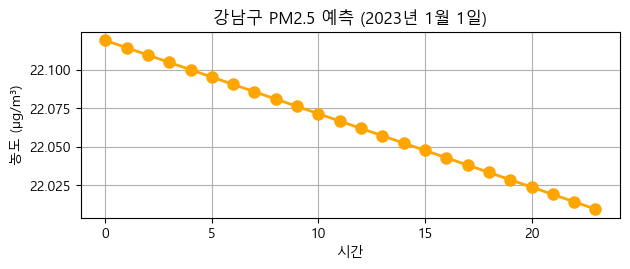

In [52]:
# PM2.5 그래프
plt.subplot(2, 1, 2)
plt.plot(range(24), pm25_predictions, marker='o', linewidth=2, markersize=8, color='orange')
plt.title(f'{selected_area} PM2.5 예측 (2023년 1월 1일)')
plt.xlabel('시간')
plt.ylabel('농도 (μg/m³)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [53]:
# 예측 결과 통계
print("\nPM10 예측 통계:")
print(f"평균: {np.mean(pm10_predictions):.1f} μg/m³")
print(f"최대: {np.max(pm10_predictions):.1f} μg/m³")
print(f"최소: {np.min(pm10_predictions):.1f} μg/m³")

print("\nPM2.5 예측 통계:")
print(f"평균: {np.mean(pm25_predictions):.1f} μg/m³")
print(f"최대: {np.max(pm25_predictions):.1f} μg/m³")
print(f"최소: {np.min(pm25_predictions):.1f} μg/m³")


PM10 예측 통계:
평균: 35.6 μg/m³
최대: 36.8 μg/m³
최소: 34.3 μg/m³

PM2.5 예측 통계:
평균: 22.1 μg/m³
최대: 22.1 μg/m³
최소: 22.0 μg/m³


In [55]:
# 시간별 예측값 df 생성
hourly_predictions = pd.DataFrame({
    '시간': range(24),
    'PM10': [f"{x:.1f}" for x in pm10_predictions],
    'PM2.5': [f"{x:.1f}" for x in pm25_predictions]
})
print("\n시간별 예측값 : ")
display(hourly_predictions)


시간별 예측값 : 


,시간,PM10,PM2.5
0,0,34.3,22.1
1,1,34.4,22.1
2,2,34.5,22.1
3,3,34.6,22.1
4,4,34.8,22.1
5,5,34.9,22.1
6,6,35.0,22.1
7,7,35.1,22.1
8,8,35.2,22.1
9,9,35.3,22.1


In [56]:
# 실제값과 예측값 비교 시각화 (테스트 데이터 기준)
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

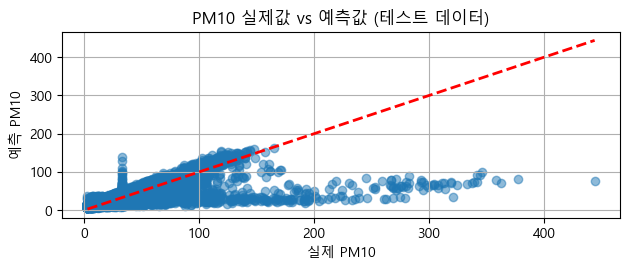

In [57]:
# PM10 비교
plt.subplot(2, 1, 1)
plt.scatter(y_test_pm10, y_pred_pm10, alpha=0.5)
plt.plot([y_test_pm10.min(), y_test_pm10.max()],
         [y_test_pm10.min(), y_test_pm10.max()],
         'r--', lw=2)
plt.xlabel('실제 PM10')
plt.ylabel('예측 PM10')
plt.title('PM10 실제값 vs 예측값 (테스트 데이터)')
plt.grid(True)
plt.tight_layout()
plt.show()

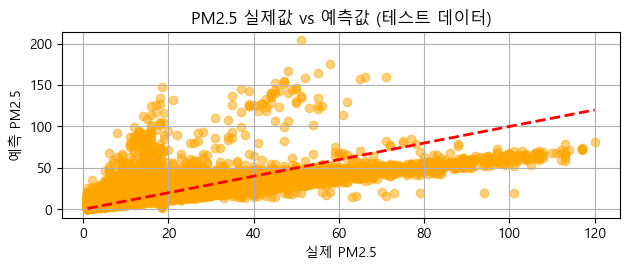

In [58]:
# PM2.5 비교
plt.subplot(2, 1, 2)
plt.scatter(y_test_pm25, y_pred_pm25, alpha=0.5, color='orange')
plt.plot([y_test_pm25.min(), y_test_pm25.max()],
         [y_test_pm25.min(), y_test_pm25.max()],
         'r--', lw=2)
plt.xlabel('실제 PM2.5')
plt.ylabel('예측 PM2.5')
plt.title('PM2.5 실제값 vs 예측값 (테스트 데이터)')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 직원 퇴사예측 예제



In [59]:
# 컬럼 설명 : satisfaction_level(직원만족도점수), last_evaluation(고용주평가점수), numbers_projects(할당된 프로젝트수)
# average_monthly_hours(한달동안 직원이 일한 평균시간), time_spent_company(회사에서 근무한 연수), work_accident(근무중 사고유무무)
# promotion_last_5years(지난 5년 직원이 승진했는지 여부), Departments(부서), Salary(월급수준 낮음, 중간, 높음), left(직원퇴사 여부부)
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [60]:
# font
plt.rcParams['font.family'] = 'Malgun Gothic'

# unicode_minus
plt.rcParams['axes.unicode_minus'] = False

# float_format
pd.options.display.float_format = '{:.2f}'.format

In [61]:
# data load
df = pd.read_csv('dataset/HR_comma_sep.csv', encoding='cp949')

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [62]:
# left 열이 정수형인지 확인하고 필요시 변환
if df['left'].dtype != 'int64':
    df['left'] = df['left'].astype(int)

In [63]:
# 범주형 변수 확인 및 전처리
# 'Departments ' 끝에 공백 제거
df.rename(columns={'Departments ': 'Departments'}, inplace=True)

In [64]:
# one-hot encoding (범주형 변수 처리)
df = pd.get_dummies(df, columns=['Departments', 'salary'], drop_first=True)

In [65]:
# X, y
X = df.drop('left', axis=1)
y = df['left']

In [66]:
# data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
# data scaling  - 균일화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.fit_transform(X_test)

In [ ]:
# model
model = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators : 나뭇가지 개수
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [70]:
# prediction
y_pred = model.predict(x_test_scaled)

In [71]:
# 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.99

Confusion Matrix:
[[2286    8]
 [  27  679]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2294
           1       0.99      0.96      0.97       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



In [72]:
# Feature Importance (중요 변수 확인)
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)


Feature Importances:
                    Feature  Importance
0        satisfaction_level        0.33
2            number_project        0.19
4        time_spend_company        0.18
3      average_montly_hours        0.14
1           last_evaluation        0.12
5             Work_accident        0.01
16               salary_low        0.01
15    Departments_technical        0.00
17            salary_medium        0.00
13        Departments_sales        0.00
14      Departments_support        0.00
7         Departments_RandD        0.00
8    Departments_accounting        0.00
6     promotion_last_5years        0.00
9            Departments_hr        0.00
10   Departments_management        0.00
11    Departments_marketing        0.00
12  Departments_product_mng        0.00
